## Logic Based FizzBuzz Function [Software 1.0]

In [70]:
import pandas as pd

def fizzbuzz(n):
    
    # Logic Explanation
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'Other'

## Create Training and Testing Datasets in CSV Format

In [71]:
def createInputCSV(start,end,filename):
    
    # Why list in Python?   
    # Answer: A list is a collection which is ordered. In the current program we need ordered data
    inputData   = []
    outputData  = []
    
    # Why do we need training Data?
    # Answer:  From training set, the model can be built upon and from testing 
    #          set is used for evaluating the model or validate the model.
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe?
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [72]:
def processData(dataset):
    
    # Why do we have to process?
    #Answer: To assign the value a label, we need to process the data. Then the data is converted to bits
    #        so the machine can recognize the pattern.
    
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [73]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10?
        #Answer: In training.csv we are passing values from 101 to 1001, 1000 numbers.
        #        2^10 =1024 (near to 1000) , therefore 10 bits is used.
        
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [74]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

## Model Definition

In [75]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 10
drop_out = 0.2
first_dense_layer_nodes  = 256
second_dense_layer_nodes = 4

def get_model():
    
    # Why do we need a model?
    #Answer: The model is used to learn the best possible solution for complicated tasks.    
    
    # Why use sequential model with layers?
    #Answer: It allows you to create models layer-by-layer for most problems. weights can be easily obtained.
    
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    # Why dropout?
    #Answer: Some of the nodes will be cut of, the network will shrink and it will be easier to train the model
    #        if the dropped nodes are needed, back propogation can be done.
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    
    # Why Softmax?
    #Answer: Softmax regression (or multinomial logistic regression) is a 
    #        generalization of logistic regression to the case where one wants to handle multiple classes.
    
    model.summary()
    
    # Why use categorical_crossentropy?
    #Answer: The data we want is 0's or 1's in matrix (one-hot encoded). 
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [76]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [77]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               2816      
_________________________________________________________________
activation_11 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 1028      
_________________________________________________________________
activation_12 (Activation)   (None, 4)                 0         
Total params: 3,844
Trainable params: 3,844
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [78]:
validation_data_split = 0.2
num_epochs = 9000
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 720 samples, validate on 180 samples
Epoch 1/9000
720/720 [==============================] - 0s 282us/step - loss: 1.2705 - acc: 0.4667 - val_loss: 1.1613 - val_acc: 0.5333
Epoch 2/9000
720/720 [==============================] - 0s 22us/step - loss: 1.1624 - acc: 0.5347 - val_loss: 1.1541 - val_acc: 0.5333
Epoch 3/9000
720/720 [==============================] - 0s 22us/step - loss: 1.1577 - acc: 0.5333 - val_loss: 1.1556 - val_acc: 0.5333
Epoch 4/9000
720/720 [==============================] - 0s 65us/step - loss: 1.1537 - acc: 0.5333 - val_loss: 1.1553 - val_acc: 0.5333
Epoch 5/9000
720/720 [==============================] - 0s 65us/step - loss: 1.1469 - acc: 0.5333 - val_loss: 1.1546 - val_acc: 0.5333
Epoch 6/9000
720/720 [==============================] - 0s 43us/step - loss: 1.1473 - acc: 0.5319 - val_loss: 1.1557 - val_acc: 0.5333
Epoch 7/9000
720/720 [==============================] - 0s 22us/step - loss: 1.1420 - acc: 0.5333 - val_loss: 1.1532 - val_acc: 0.5333
Epoch 8/

720/720 [==============================] - 0s 43us/step - loss: 1.0621 - acc: 0.5361 - val_loss: 1.1337 - val_acc: 0.5333
Epoch 61/9000
720/720 [==============================] - 0s 65us/step - loss: 1.0573 - acc: 0.5361 - val_loss: 1.1322 - val_acc: 0.5333
Epoch 62/9000
720/720 [==============================] - 0s 43us/step - loss: 1.0546 - acc: 0.5375 - val_loss: 1.1356 - val_acc: 0.5333
Epoch 63/9000
720/720 [==============================] - 0s 21us/step - loss: 1.0521 - acc: 0.5333 - val_loss: 1.1306 - val_acc: 0.5333
Epoch 64/9000
720/720 [==============================] - 0s 43us/step - loss: 1.0501 - acc: 0.5361 - val_loss: 1.1293 - val_acc: 0.5333
Epoch 65/9000
720/720 [==============================] - 0s 65us/step - loss: 1.0593 - acc: 0.5389 - val_loss: 1.1264 - val_acc: 0.5333
Epoch 66/9000
720/720 [==============================] - 0s 87us/step - loss: 1.0481 - acc: 0.5375 - val_loss: 1.1244 - val_acc: 0.5333
Epoch 67/9000
720/720 [==============================] - 0s 22

Epoch 120/9000
720/720 [==============================] - 0s 22us/step - loss: 0.9277 - acc: 0.5778 - val_loss: 1.0680 - val_acc: 0.5222
Epoch 121/9000
720/720 [==============================] - 0s 43us/step - loss: 0.9317 - acc: 0.5667 - val_loss: 1.0691 - val_acc: 0.5444
Epoch 122/9000
720/720 [==============================] - 0s 43us/step - loss: 0.9359 - acc: 0.5764 - val_loss: 1.0689 - val_acc: 0.5389
Epoch 123/9000
720/720 [==============================] - 0s 65us/step - loss: 0.9213 - acc: 0.5833 - val_loss: 1.0677 - val_acc: 0.5444
Epoch 124/9000
720/720 [==============================] - 0s 65us/step - loss: 0.9287 - acc: 0.5736 - val_loss: 1.0632 - val_acc: 0.5333
Epoch 125/9000
720/720 [==============================] - 0s 65us/step - loss: 0.9185 - acc: 0.5819 - val_loss: 1.0597 - val_acc: 0.5389
Epoch 126/9000
720/720 [==============================] - 0s 65us/step - loss: 0.9235 - acc: 0.5833 - val_loss: 1.0585 - val_acc: 0.5333
Epoch 127/9000
720/720 [=================

720/720 [==============================] - 0s 43us/step - loss: 0.8143 - acc: 0.6528 - val_loss: 0.9944 - val_acc: 0.5389
Epoch 180/9000
720/720 [==============================] - 0s 43us/step - loss: 0.8165 - acc: 0.6264 - val_loss: 0.9842 - val_acc: 0.5444
Epoch 181/9000
720/720 [==============================] - 0s 43us/step - loss: 0.8168 - acc: 0.6472 - val_loss: 0.9883 - val_acc: 0.5389
Epoch 182/9000
720/720 [==============================] - 0s 43us/step - loss: 0.8151 - acc: 0.6583 - val_loss: 0.9927 - val_acc: 0.5444
Epoch 183/9000
720/720 [==============================] - 0s 43us/step - loss: 0.8149 - acc: 0.6472 - val_loss: 0.9811 - val_acc: 0.5444
Epoch 184/9000
720/720 [==============================] - 0s 21us/step - loss: 0.8168 - acc: 0.6486 - val_loss: 0.9848 - val_acc: 0.5444
Epoch 185/9000
720/720 [==============================] - 0s 22us/step - loss: 0.8116 - acc: 0.6528 - val_loss: 0.9800 - val_acc: 0.5444
Epoch 186/9000
720/720 [==============================] 

Epoch 239/9000
720/720 [==============================] - 0s 60us/step - loss: 0.7414 - acc: 0.6958 - val_loss: 0.9105 - val_acc: 0.5722
Epoch 240/9000
720/720 [==============================] - 0s 61us/step - loss: 0.7197 - acc: 0.7083 - val_loss: 0.9037 - val_acc: 0.5778
Epoch 241/9000
720/720 [==============================] - 0s 46us/step - loss: 0.7138 - acc: 0.7083 - val_loss: 0.8929 - val_acc: 0.6000
Epoch 242/9000
720/720 [==============================] - 0s 69us/step - loss: 0.7058 - acc: 0.7167 - val_loss: 0.9030 - val_acc: 0.5889
Epoch 243/9000
720/720 [==============================] - 0s 82us/step - loss: 0.7127 - acc: 0.7042 - val_loss: 0.8979 - val_acc: 0.5778
Epoch 244/9000
720/720 [==============================] - 0s 62us/step - loss: 0.7073 - acc: 0.7250 - val_loss: 0.8911 - val_acc: 0.5778
Epoch 245/9000
720/720 [==============================] - 0s 88us/step - loss: 0.7235 - acc: 0.7097 - val_loss: 0.8881 - val_acc: 0.6000
Epoch 246/9000
720/720 [=================

Epoch 299/9000
720/720 [==============================] - 0s 37us/step - loss: 0.6393 - acc: 0.7403 - val_loss: 0.8191 - val_acc: 0.6389
Epoch 300/9000
720/720 [==============================] - 0s 20us/step - loss: 0.6349 - acc: 0.7611 - val_loss: 0.8422 - val_acc: 0.5778
Epoch 301/9000
720/720 [==============================] - 0s 43us/step - loss: 0.6429 - acc: 0.7694 - val_loss: 0.8355 - val_acc: 0.6056
Epoch 302/9000
720/720 [==============================] - 0s 24us/step - loss: 0.6674 - acc: 0.7472 - val_loss: 0.8187 - val_acc: 0.6611
Epoch 303/9000
720/720 [==============================] - 0s 30us/step - loss: 0.6336 - acc: 0.7764 - val_loss: 0.8335 - val_acc: 0.6056
Epoch 304/9000
720/720 [==============================] - 0s 30us/step - loss: 0.6440 - acc: 0.7556 - val_loss: 0.8313 - val_acc: 0.6167
Epoch 305/9000
720/720 [==============================] - 0s 21us/step - loss: 0.6265 - acc: 0.7750 - val_loss: 0.8338 - val_acc: 0.5944
Epoch 306/9000
720/720 [=================

Epoch 359/9000
720/720 [==============================] - 0s 37us/step - loss: 0.5811 - acc: 0.7931 - val_loss: 0.7581 - val_acc: 0.6833
Epoch 360/9000
720/720 [==============================] - 0s 24us/step - loss: 0.5763 - acc: 0.7903 - val_loss: 0.7731 - val_acc: 0.6444
Epoch 361/9000
720/720 [==============================] - 0s 32us/step - loss: 0.5594 - acc: 0.8069 - val_loss: 0.7662 - val_acc: 0.6556
Epoch 362/9000
720/720 [==============================] - 0s 36us/step - loss: 0.5642 - acc: 0.8014 - val_loss: 0.7800 - val_acc: 0.6389
Epoch 363/9000
720/720 [==============================] - 0s 30us/step - loss: 0.5650 - acc: 0.7944 - val_loss: 0.7703 - val_acc: 0.6556
Epoch 364/9000
720/720 [==============================] - 0s 30us/step - loss: 0.5904 - acc: 0.7722 - val_loss: 0.7716 - val_acc: 0.6556
Epoch 365/9000
720/720 [==============================] - 0s 29us/step - loss: 0.5988 - acc: 0.7597 - val_loss: 0.7771 - val_acc: 0.6333
Epoch 366/9000
720/720 [=================

Epoch 419/9000
720/720 [==============================] - 0s 32us/step - loss: 0.5596 - acc: 0.7931 - val_loss: 0.7280 - val_acc: 0.6833
Epoch 420/9000
720/720 [==============================] - 0s 29us/step - loss: 0.5478 - acc: 0.8111 - val_loss: 0.7137 - val_acc: 0.6944
Epoch 421/9000
720/720 [==============================] - 0s 31us/step - loss: 0.5622 - acc: 0.8000 - val_loss: 0.7254 - val_acc: 0.6833
Epoch 422/9000
720/720 [==============================] - 0s 19us/step - loss: 0.5227 - acc: 0.8028 - val_loss: 0.7138 - val_acc: 0.7111
Epoch 423/9000
720/720 [==============================] - 0s 33us/step - loss: 0.5491 - acc: 0.8125 - val_loss: 0.7509 - val_acc: 0.6667
Epoch 424/9000
720/720 [==============================] - 0s 29us/step - loss: 0.5413 - acc: 0.8069 - val_loss: 0.7322 - val_acc: 0.6667
Epoch 425/9000
720/720 [==============================] - 0s 31us/step - loss: 0.5188 - acc: 0.8097 - val_loss: 0.7184 - val_acc: 0.6833
Epoch 426/9000
720/720 [=================

720/720 [==============================] - 0s 36us/step - loss: 0.5146 - acc: 0.8181 - val_loss: 0.7053 - val_acc: 0.6833
Epoch 479/9000
720/720 [==============================] - 0s 27us/step - loss: 0.4892 - acc: 0.8347 - val_loss: 0.7432 - val_acc: 0.6611
Epoch 480/9000
720/720 [==============================] - 0s 29us/step - loss: 0.5068 - acc: 0.8042 - val_loss: 0.7015 - val_acc: 0.6833
Epoch 481/9000
720/720 [==============================] - 0s 29us/step - loss: 0.5360 - acc: 0.7986 - val_loss: 0.7085 - val_acc: 0.6889
Epoch 482/9000
720/720 [==============================] - 0s 26us/step - loss: 0.5130 - acc: 0.8153 - val_loss: 0.7067 - val_acc: 0.6833
Epoch 483/9000
720/720 [==============================] - 0s 29us/step - loss: 0.4792 - acc: 0.8347 - val_loss: 0.7061 - val_acc: 0.6833
Epoch 484/9000
720/720 [==============================] - 0s 23us/step - loss: 0.4774 - acc: 0.8389 - val_loss: 0.7310 - val_acc: 0.6722
Epoch 485/9000
720/720 [==============================] 

Epoch 538/9000
720/720 [==============================] - 0s 63us/step - loss: 0.4916 - acc: 0.8069 - val_loss: 0.6456 - val_acc: 0.7389
Epoch 539/9000
720/720 [==============================] - 0s 55us/step - loss: 0.4769 - acc: 0.8306 - val_loss: 0.6733 - val_acc: 0.7222
Epoch 540/9000
720/720 [==============================] - 0s 70us/step - loss: 0.4536 - acc: 0.8389 - val_loss: 0.6520 - val_acc: 0.7278
Epoch 541/9000
720/720 [==============================] - 0s 62us/step - loss: 0.4689 - acc: 0.8361 - val_loss: 0.6847 - val_acc: 0.6722
Epoch 542/9000
720/720 [==============================] - 0s 96us/step - loss: 0.4877 - acc: 0.8319 - val_loss: 0.6683 - val_acc: 0.7056
Epoch 543/9000
720/720 [==============================] - 0s 53us/step - loss: 0.4938 - acc: 0.8194 - val_loss: 0.6726 - val_acc: 0.7000
Epoch 544/9000
720/720 [==============================] - 0s 74us/step - loss: 0.4806 - acc: 0.8403 - val_loss: 0.6615 - val_acc: 0.6944
Epoch 545/9000
720/720 [=================

Epoch 598/9000
720/720 [==============================] - 0s 22us/step - loss: 0.4379 - acc: 0.8458 - val_loss: 0.6998 - val_acc: 0.6722
Epoch 599/9000
720/720 [==============================] - 0s 33us/step - loss: 0.4803 - acc: 0.8208 - val_loss: 0.6891 - val_acc: 0.6833
Epoch 600/9000
720/720 [==============================] - 0s 56us/step - loss: 0.4714 - acc: 0.8333 - val_loss: 0.6488 - val_acc: 0.7000
Epoch 601/9000
720/720 [==============================] - 0s 48us/step - loss: 0.4983 - acc: 0.8056 - val_loss: 0.6331 - val_acc: 0.7333
Epoch 602/9000
720/720 [==============================] - 0s 62us/step - loss: 0.4574 - acc: 0.8306 - val_loss: 0.6309 - val_acc: 0.7278
Epoch 603/9000
720/720 [==============================] - 0s 72us/step - loss: 0.4718 - acc: 0.8208 - val_loss: 0.6372 - val_acc: 0.7222
Epoch 604/9000
720/720 [==============================] - 0s 78us/step - loss: 0.4602 - acc: 0.8472 - val_loss: 0.6707 - val_acc: 0.7111
Epoch 605/9000
720/720 [=================

720/720 [==============================] - 0s 41us/step - loss: 0.4211 - acc: 0.8431 - val_loss: 0.6423 - val_acc: 0.7111
Epoch 658/9000
720/720 [==============================] - 0s 38us/step - loss: 0.4291 - acc: 0.8500 - val_loss: 0.6648 - val_acc: 0.6944
Epoch 659/9000
720/720 [==============================] - 0s 34us/step - loss: 0.4362 - acc: 0.8431 - val_loss: 0.6595 - val_acc: 0.6889
Epoch 660/9000
720/720 [==============================] - ETA: 0s - loss: 0.5066 - acc: 0.835 - 0s 28us/step - loss: 0.4562 - acc: 0.8347 - val_loss: 0.6514 - val_acc: 0.6944
Epoch 661/9000
720/720 [==============================] - 0s 25us/step - loss: 0.4234 - acc: 0.8417 - val_loss: 0.6241 - val_acc: 0.7111
Epoch 662/9000
720/720 [==============================] - 0s 33us/step - loss: 0.4277 - acc: 0.8514 - val_loss: 0.6109 - val_acc: 0.7389
Epoch 663/9000
720/720 [==============================] - 0s 28us/step - loss: 0.3984 - acc: 0.8583 - val_loss: 0.6071 - val_acc: 0.7500
Epoch 664/9000
720

720/720 [==============================] - 0s 34us/step - loss: 0.4502 - acc: 0.8194 - val_loss: 0.5916 - val_acc: 0.7500
Epoch 717/9000
720/720 [==============================] - 0s 77us/step - loss: 0.4241 - acc: 0.8333 - val_loss: 0.6133 - val_acc: 0.7389
Epoch 718/9000
720/720 [==============================] - 0s 50us/step - loss: 0.4218 - acc: 0.8458 - val_loss: 0.6125 - val_acc: 0.7444
Epoch 719/9000
720/720 [==============================] - 0s 68us/step - loss: 0.4370 - acc: 0.8347 - val_loss: 0.6380 - val_acc: 0.7389
Epoch 720/9000
720/720 [==============================] - 0s 64us/step - loss: 0.4092 - acc: 0.8417 - val_loss: 0.6504 - val_acc: 0.7056
Epoch 721/9000
720/720 [==============================] - 0s 73us/step - loss: 0.4138 - acc: 0.8375 - val_loss: 0.6321 - val_acc: 0.7444
Epoch 722/9000
720/720 [==============================] - 0s 92us/step - loss: 0.4025 - acc: 0.8556 - val_loss: 0.5892 - val_acc: 0.7722
Epoch 723/9000
720/720 [==============================] 

Epoch 776/9000
720/720 [==============================] - 0s 54us/step - loss: 0.3953 - acc: 0.8653 - val_loss: 0.5732 - val_acc: 0.7778
Epoch 777/9000
720/720 [==============================] - 0s 48us/step - loss: 0.3935 - acc: 0.8639 - val_loss: 0.6061 - val_acc: 0.7667
Epoch 778/9000
720/720 [==============================] - 0s 28us/step - loss: 0.4056 - acc: 0.8403 - val_loss: 0.6443 - val_acc: 0.7167
Epoch 779/9000
720/720 [==============================] - 0s 70us/step - loss: 0.3934 - acc: 0.8486 - val_loss: 0.6060 - val_acc: 0.7278
Epoch 780/9000
720/720 [==============================] - 0s 74us/step - loss: 0.3992 - acc: 0.8569 - val_loss: 0.6297 - val_acc: 0.7278
Epoch 781/9000
720/720 [==============================] - 0s 60us/step - loss: 0.3899 - acc: 0.8486 - val_loss: 0.6518 - val_acc: 0.7278
Epoch 782/9000
720/720 [==============================] - 0s 74us/step - loss: 0.4190 - acc: 0.8389 - val_loss: 0.5977 - val_acc: 0.7556
Epoch 783/9000
720/720 [=================

Epoch 836/9000
720/720 [==============================] - 0s 70us/step - loss: 0.4005 - acc: 0.8500 - val_loss: 0.5797 - val_acc: 0.7556
Epoch 837/9000
720/720 [==============================] - 0s 59us/step - loss: 0.4183 - acc: 0.8333 - val_loss: 0.5933 - val_acc: 0.7611
Epoch 838/9000
720/720 [==============================] - 0s 75us/step - loss: 0.3757 - acc: 0.8597 - val_loss: 0.6374 - val_acc: 0.7278
Epoch 839/9000
720/720 [==============================] - 0s 66us/step - loss: 0.4018 - acc: 0.8500 - val_loss: 0.5760 - val_acc: 0.7778
Epoch 840/9000
720/720 [==============================] - 0s 82us/step - loss: 0.4259 - acc: 0.8347 - val_loss: 0.5530 - val_acc: 0.7889
Epoch 841/9000
720/720 [==============================] - 0s 84us/step - loss: 0.3957 - acc: 0.8625 - val_loss: 0.5895 - val_acc: 0.7611
Epoch 842/9000
720/720 [==============================] - ETA: 0s - loss: 0.3781 - acc: 0.828 - 0s 35us/step - loss: 0.4008 - acc: 0.8333 - val_loss: 0.5917 - val_acc: 0.7611
Epo

720/720 [==============================] - 0s 37us/step - loss: 0.3910 - acc: 0.8722 - val_loss: 0.6567 - val_acc: 0.7111
Epoch 896/9000
720/720 [==============================] - 0s 23us/step - loss: 0.3644 - acc: 0.8750 - val_loss: 0.6216 - val_acc: 0.7278
Epoch 897/9000
720/720 [==============================] - 0s 17us/step - loss: 0.4245 - acc: 0.8264 - val_loss: 0.6559 - val_acc: 0.7056
Epoch 898/9000
720/720 [==============================] - 0s 36us/step - loss: 0.3854 - acc: 0.8514 - val_loss: 0.6006 - val_acc: 0.7444
Epoch 899/9000
720/720 [==============================] - 0s 21us/step - loss: 0.3791 - acc: 0.8708 - val_loss: 0.5924 - val_acc: 0.7500
Epoch 900/9000
720/720 [==============================] - 0s 30us/step - loss: 0.3820 - acc: 0.8583 - val_loss: 0.6031 - val_acc: 0.7500
Epoch 901/9000
720/720 [==============================] - 0s 33us/step - loss: 0.3676 - acc: 0.8736 - val_loss: 0.6066 - val_acc: 0.7278
Epoch 902/9000
720/720 [==============================] 

Epoch 955/9000
720/720 [==============================] - 0s 62us/step - loss: 0.3824 - acc: 0.8597 - val_loss: 0.6001 - val_acc: 0.7500
Epoch 956/9000
720/720 [==============================] - 0s 24us/step - loss: 0.3576 - acc: 0.8667 - val_loss: 0.6068 - val_acc: 0.7389
Epoch 957/9000
720/720 [==============================] - 0s 70us/step - loss: 0.4202 - acc: 0.8417 - val_loss: 0.6044 - val_acc: 0.7556
Epoch 958/9000
720/720 [==============================] - 0s 57us/step - loss: 0.3980 - acc: 0.8403 - val_loss: 0.5625 - val_acc: 0.7667
Epoch 959/9000
720/720 [==============================] - 0s 62us/step - loss: 0.4208 - acc: 0.8431 - val_loss: 0.6122 - val_acc: 0.7389
Epoch 960/9000
720/720 [==============================] - 0s 47us/step - loss: 0.3896 - acc: 0.8528 - val_loss: 0.5929 - val_acc: 0.7611
Epoch 961/9000
720/720 [==============================] - 0s 54us/step - loss: 0.3942 - acc: 0.8472 - val_loss: 0.5794 - val_acc: 0.7667
Epoch 962/9000
720/720 [=================

720/720 [==============================] - 0s 55us/step - loss: 0.3798 - acc: 0.8625 - val_loss: 0.5963 - val_acc: 0.7444
Epoch 1015/9000
720/720 [==============================] - 0s 20us/step - loss: 0.3875 - acc: 0.8472 - val_loss: 0.5754 - val_acc: 0.7611
Epoch 1016/9000
720/720 [==============================] - 0s 39us/step - loss: 0.3474 - acc: 0.8611 - val_loss: 0.5859 - val_acc: 0.7611
Epoch 1017/9000
720/720 [==============================] - 0s 34us/step - loss: 0.3646 - acc: 0.8708 - val_loss: 0.6252 - val_acc: 0.7333
Epoch 1018/9000
720/720 [==============================] - 0s 38us/step - loss: 0.4040 - acc: 0.8472 - val_loss: 0.5817 - val_acc: 0.7611
Epoch 1019/9000
720/720 [==============================] - 0s 19us/step - loss: 0.3523 - acc: 0.8639 - val_loss: 0.6012 - val_acc: 0.7611
Epoch 1020/9000
720/720 [==============================] - 0s 34us/step - loss: 0.3717 - acc: 0.8597 - val_loss: 0.5605 - val_acc: 0.7722
Epoch 1021/9000
720/720 [=========================

# Training and Validation Graphs

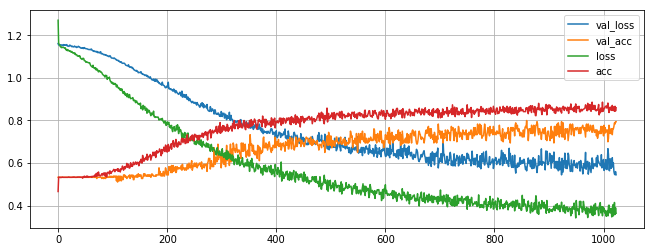

In [79]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(grid=True, figsize=(11,4))

# Testing Accuracy [Software 2.0]

In [80]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"   
    

In [81]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "malinian")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "50289383")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')



Errors: 18  Correct :82
Testing Accuracy: 82.0


In [82]:
import pandas as pd

test=pd.read_csv('output.csv')
test[['input','label','predicted_label']]


,input,label,predicted_label
0,UBID,malinian,NaN
1,personNumber,50289383,NaN
2,1,Other,Other
3,2,Other,Other
4,3,Fizz,Fizz
5,4,Other,Other
6,5,Buzz,Other
7,6,Fizz,Fizz
8,7,Other,Other
9,8,Other,Other


In [83]:
x=test.iloc[2:101,2]==test.iloc[2:101,3].values
print(x)

2       True
3       True
4       True
5       True
6      False
7       True
8       True
9       True
10      True
11      True
12      True
13     False
14      True
15      True
16      True
17      True
18     False
19     False
20      True
21     False
22      True
23      True
24      True
25      True
26     False
27      True
28      True
29      True
30      True
31      True
       ...  
71      True
72      True
73      True
74      True
75      True
76      True
77      True
78      True
79      True
80      True
81     False
82      True
83      True
84      True
85      True
86      True
87      True
88      True
89      True
90      True
91      True
92      True
93     False
94      True
95      True
96      True
97     False
98      True
99      True
100    False
Name: label, Length: 99, dtype: bool
